z5527155

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, classification_report
import os
import pandas as pd
import seaborn as sns

csv_file = '/Users/chenlinlee/Documents/COMP9517/COMP9517/Lab3/Chinese_MINST_Dataset/chinese_mnist.csv'
df = pd.read_csv(csv_file)

img_dir = '/Users/chenlinlee/Documents/COMP9517/COMP9517/Lab3/Chinese_MINST_Dataset/data/data'

def load_image(file_name):
    image_path = os.path.join(img_dir, file_name)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (32, 32))
    return image.flatten()

X1 = []
y1 = []
X2 = []
y2 = []

df_sample_6000 = df.sample(n=6000)
df_sample_11000 = df.sample(n=11000)

for _, row in df_sample_6000.iterrows():
    image_name = f'input_{row['suite_id']}_{row['sample_id']}_{row['code']}.jpg'
    label = row['value']
    X1.append(load_image(image_name))
    y1.append(label)

for _, row in df_sample_11000.iterrows():
    image_name = f'input_{row['suite_id']}_{row['sample_id']}_{row['code']}.jpg'
    label = row['value']
    X2.append(load_image(image_name))
    y2.append(label)

X1 = np.array(X1)
y1 = np.array(y1)
X2 = np.array(X2)
y2 = np.array(y2)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.15)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.10)

------ 6000 images

KNeighbourClassifier

Accuracy: 55.78%
Precision: 0.63
Recall: 0.56
F1-Score: 0.56
              precision    recall  f1-score   support

           0       0.81      0.92      0.86        52
           1       0.38      0.90      0.53        70
           2       0.28      0.63      0.39        54
           3       0.45      0.38      0.41        65
           4       0.72      0.59      0.65        56
           5       0.70      0.42      0.52        67
           6       0.42      0.43      0.43        51
           7       0.58      0.43      0.50        60
           8       0.93      0.86      0.89        72
           9       0.70      0.38      0.49        60
          10       0.49      0.59      0.53        59
         100       0.83      0.47      0.60        51
        1000       0.51      0.37      0.43        60
       10000       0.75      0.49      0.59        67
   100000000       0.89      0.43      0.58        56

    accuracy                           0.56       900
   macro avg       

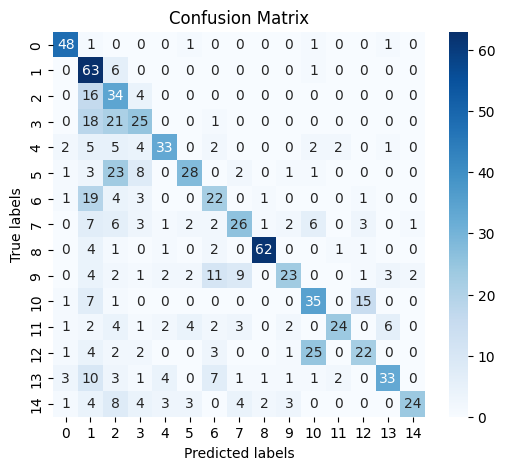

In [15]:
def KNN(X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=3)

    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-Score: {f1:.2f}')
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

KNN(X1_train, y1_train, X1_test, y1_test)

Decision Tree

Accuracy: 42.33%
Precision: 0.43
Recall: 0.42
F1-Score: 0.42
              precision    recall  f1-score   support

           0       0.59      0.50      0.54        52
           1       0.80      0.79      0.79        70
           2       0.46      0.63      0.53        54
           3       0.39      0.37      0.38        65
           4       0.34      0.27      0.30        56
           5       0.45      0.45      0.45        67
           6       0.23      0.27      0.25        51
           7       0.37      0.32      0.34        60
           8       0.57      0.60      0.58        72
           9       0.24      0.28      0.26        60
          10       0.49      0.46      0.47        59
         100       0.31      0.35      0.33        51
        1000       0.39      0.37      0.38        60
       10000       0.38      0.31      0.34        67
   100000000       0.29      0.29      0.29        56

    accuracy                           0.42       900
   macro avg       

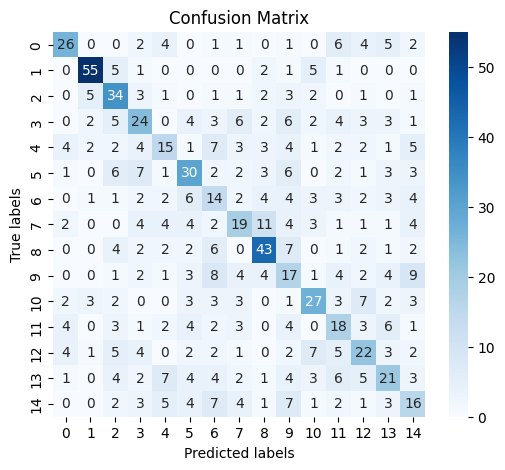

In [16]:
def DT(X_train, y_train, X_test, y_test):
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)

    y_pred = dt.predict(X_test)
    dt_accuracy = accuracy_score(y_test, y_pred)
    dt_precision = precision_score(y_test, y_pred, average='weighted')
    dt_recall = recall_score(y_test, y_pred, average='weighted')
    dt_f1 = f1_score(y_test, y_pred, average='weighted')

    print(f'Accuracy: {dt_accuracy * 100:.2f}%')
    print(f'Precision: {dt_precision:.2f}')
    print(f'Recall: {dt_recall:.2f}')
    print(f'F1-Score: {dt_f1:.2f}')
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

DT(X1_train, y1_train, X1_test, y1_test)

SGD

Accuracy: 30.44%
Precision: 0.37
Recall: 0.30
F1-Score: 0.31
              precision    recall  f1-score   support

           0       0.51      0.37      0.43        52
           1       0.63      0.17      0.27        70
           2       0.40      0.11      0.17        54
           3       0.34      0.22      0.26        65
           4       0.34      0.43      0.38        56
           5       0.31      0.46      0.37        67
           6       0.15      0.51      0.23        51
           7       0.36      0.28      0.32        60
           8       0.57      0.40      0.47        72
           9       0.15      0.10      0.12        60
          10       0.36      0.49      0.42        59
         100       0.14      0.25      0.18        51
        1000       0.42      0.33      0.37        60
       10000       0.31      0.18      0.23        67
   100000000       0.40      0.29      0.33        56

    accuracy                           0.30       900
   macro avg       

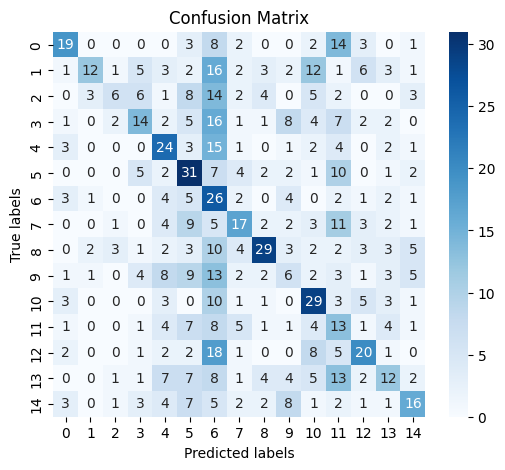

In [17]:
def SGD(X_train, y_train, X_test, y_test):
    sgd = SGDClassifier(max_iter=250)
    sgd.fit(X_train, y_train)

    y_pred = sgd.predict(X_test)
    sgd_accuracy = accuracy_score(y_test, y_pred)
    sgd_precision = precision_score(y_test, y_pred, average='weighted')
    sgd_recall = recall_score(y_test, y_pred, average='weighted')
    sgd_f1 = f1_score(y_test, y_pred, average='weighted')

    print(f'Accuracy: {sgd_accuracy * 100:.2f}%')
    print(f'Precision: {sgd_precision:.2f}')
    print(f'Recall: {sgd_recall:.2f}')
    print(f'F1-Score: {sgd_f1:.2f}')
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

SGD(X1_train, y1_train, X1_test, y1_test)

------ 11000 images

KNeighbourClassfier

Accuracy: 63.55%
Precision: 0.69
Recall: 0.64
F1-Score: 0.64
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        67
           1       0.40      0.97      0.56        76
           2       0.43      0.66      0.52        73
           3       0.54      0.44      0.48        86
           4       0.79      0.67      0.73        86
           5       0.69      0.49      0.58        69
           6       0.56      0.68      0.61        68
           7       0.64      0.53      0.58        72
           8       0.92      0.93      0.92        72
           9       0.82      0.52      0.64        71
          10       0.49      0.69      0.58        55
         100       0.74      0.46      0.57        70
        1000       0.73      0.51      0.60        74
       10000       0.75      0.61      0.67        79
   100000000       0.90      0.55      0.68        82

    accuracy                           0.64      1100
   macro avg       

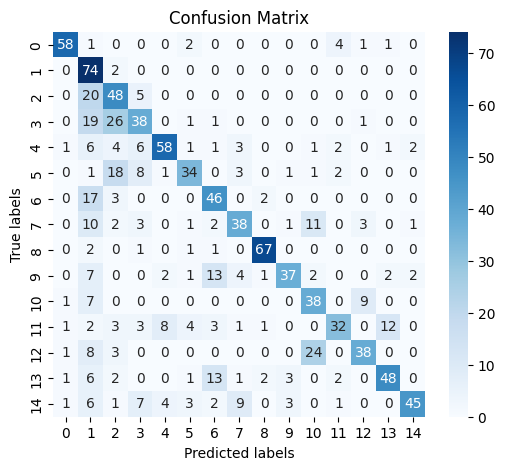

In [18]:
KNN(X2_train,y2_train, X2_test, y2_test)

Decision Tree

Accuracy: 45.64%
Precision: 0.46
Recall: 0.46
F1-Score: 0.45
              precision    recall  f1-score   support

           0       0.59      0.55      0.57        67
           1       0.80      0.86      0.83        76
           2       0.59      0.52      0.55        73
           3       0.37      0.35      0.36        86
           4       0.53      0.51      0.52        86
           5       0.31      0.33      0.32        69
           6       0.32      0.37      0.34        68
           7       0.40      0.36      0.38        72
           8       0.60      0.69      0.64        72
           9       0.25      0.25      0.25        71
          10       0.44      0.55      0.49        55
         100       0.45      0.40      0.42        70
        1000       0.45      0.45      0.45        74
       10000       0.35      0.34      0.34        79
   100000000       0.38      0.34      0.36        82

    accuracy                           0.46      1100
   macro avg       

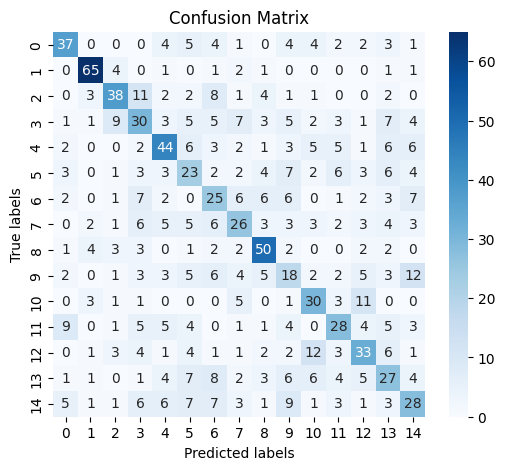

In [19]:
DT(X2_train,y2_train, X2_test, y2_test)

SGD

Accuracy: 37.00%
Precision: 0.41
Recall: 0.37
F1-Score: 0.37
              precision    recall  f1-score   support

           0       0.51      0.61      0.56        67
           1       0.81      0.68      0.74        76
           2       0.22      0.44      0.30        73
           3       0.50      0.22      0.31        86
           4       0.59      0.47      0.52        86
           5       0.38      0.30      0.34        69
           6       0.20      0.29      0.24        68
           7       0.25      0.04      0.07        72
           8       0.46      0.50      0.48        72
           9       0.19      0.49      0.27        71
          10       0.44      0.44      0.44        55
         100       0.25      0.24      0.25        70
        1000       0.45      0.30      0.36        74
       10000       0.38      0.16      0.23        79
   100000000       0.44      0.39      0.41        82

    accuracy                           0.37      1100
   macro avg       

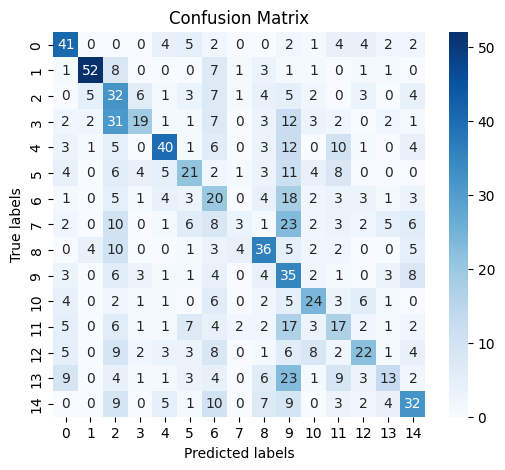

In [20]:
SGD(X2_train,y2_train, X2_test, y2_test)

It can be observed that the accuracy of each method increase with the size of the training dataset.